<a href="https://colab.research.google.com/github/tinatrinh8/Knapsack-Algorithm/blob/main/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 88;
Member Names: Chentao Jin, Tina Trinh;
Member Student Numbers: 300220076, 300175427;

**2. Knapsack Problem**

Find the solution to pack articles(with weight) with highest total price to a ksapnack with limited capcity

**3. Dataset**

10000 cases, each case includes 5 articles with price and weight, ksapnack capacity, best pick solution and best total price

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
url = "https://raw.githubusercontent.com/SuperChentao/CSI4106_Assignment1/main/knapsack_5_items.csv"

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):

  if(isinstance(string,list)):
    return string

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-6-833fb421dc49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
<ipython-input-6-833fb421dc49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))


Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**

Generate all possible solutions and pick the one with highest total value, if the total weight exceeds the capacity, total value is 0

In [ ]:
# Function to calculate total value
def total_price(solution,prices,weights,capacity):

  # Initializing price and weight
  total_price = 0
  total_weight = 0

  # Loop through each item
  for x in range(0, 5):

    if (solution[x] == 0):
      continue

    # If there's an item, add them to the weights & prices
    total_price += prices[x]
    total_weight += weights[x]

    # If the total weight is more than the capacity then return 0
    if (total_weight > capacity):
      return 0

  return total_price

In [ ]:
# Generate all posible pick and pick the best one
def gen_and_test(data):

  # Take from the the list... the weights, prices and capacity
  weights = string_to_list(data['Weights'])
  prices = string_to_list(data['Prices'])
  capacity = data['Capacity']

  best_solution = []
  best_solution_price = 0

  # Loop through all combos of each item
  for a in range(0, 2):
    for b in range(0, 2):
        for c in range(0, 2):
          for d in range(0, 2):
            for e in range(0, 2):

              # Calculate total price for the combination
              price = total_price([a,b,c,d,e], prices, weights, capacity)

              # Check if the current combination is pricier than the best solution
              if (price > best_solution_price):

                # If so, make it the best price
                best_solution_price = price
                best_solution = [a,b,c,d,e]

  # Print("Price is {} with pick{}".format(best_solution_price, best_solution))
  return best_solution_price, best_solution



In [ ]:
solutions = []

for _, row in dataset.iterrows():

    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**
The generate and test algorithm runs through every possible solution, it can ALWAYS find the best solution.

As the title speaks for itself, *Generate and Test* is a heuristic search which solve *Knapsack* by finding every posssbility of item combination to find an optimal solution. This means that the goal is to find the best solution, it would make sure that through every possible solution, it would find the "best". The "best" is finding the highest total price but staying within reach.

As a small breakdown, it first takes the weights and prices from the dataset. Then, using a nested loop, it will loop through all the possible combinations by iterating through each item. Then, it will check for the total price and update it if it is more than best solution price.


The time complexity is O(n^2) due the combinations of finding every item. In this case with lasrge dataset, it can be time consuming. This algorithm is "guaranteed" to find the most optimal solutions, but not most efficient.

The result being printed as 1.0 means that it 100% identified the optimal solution in our algorithm. Thus, it means it found the best price while staying under the condition of the capacity. Since there are different weights, prices, and capacities, there are many obstacles, but it still manage on finding optimal accuracy.


------------------------------------------------------------------------------------------------

**5. Greedy Search**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
# Define the greedy algorithm
def greedy(row):

    # Extracting the weights and capacity
    capacity = row['Capacity']
    items = len(row['Weights'])
    best_solution_price = 0
    best_solution = [0] * items

    # Convert weights and prices columns to numeric arrays
    prices = np.array(row['Prices'].replace('[','').replace(']','').split(), dtype=int)
    weights = np.array(row['Weights'].replace('[','').replace(']','').split(), dtype=int)
    items = len(weights)

    # Create a list of item indices sorted with the items with the highest price per weight as priotization
    item_indices = sorted(range(items), key=lambda i: prices[i] / weights[i] if weights[i] != 0 else 0, reverse=True)

    # Loop through the items with price per weights in the order with the highest value first
    for i in item_indices:

        # If the item is less than the capacity, then add to the solution.
        if weights[i] <= capacity:

            best_solution[i] = 1
            capacity -= weights[i]
            best_solution_price += prices[i]

        else:
            continue

    return best_solution_price, best_solution

# Load the dataset from the corrected CSV file
url = "https://raw.githubusercontent.com/SuperChentao/CSI4106_Assignment1/main/knapsack_5_items.csv"
dataset = pd.read_csv(url)

# Convert best picks' strings into number arrays. If the value is a string, it'll convert it. If not, it'll stay the same.
dataset['Best picks'] = dataset['Best picks'].apply(lambda x: np.fromstring(x[1:-1], sep=' ') if isinstance(x, str) else x)

# Drop rows with missing values
dataset = dataset.dropna(subset=['Weights', 'Prices', 'Best picks'])


In [ ]:
solutions_greedy = []

for index, row in dataset.iterrows():

    target = row['Best price']

    if pd.isna(target) or not np.isfinite(target):

        print(f"Skipping row {index} due to invalid 'Best price' value: {target}")
        continue

    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)

In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Your Analysis:**

The greedy approach is alternative way to find the optimal solution for the knapsack problem. The approach is taken at face value. This means that at each step it make an optimal decision without considering the "consequences" in the future steps. It focuses on best local option which assumes a solution that fits best withinthe paramters. However it suffers in short-sightedness. It is iterative, so it is based on previous decisions.

After initialization, we will convert the prices and weights to int arrays. Then it will create a list of item indices sorted by the highest value to lowest, since it's greedy. It will check each item and if the current item has a heavier weight than the current capacity, then it will be skipped.

With the accuracy of 83.42%, it is quite effective, but it is not the most optimal. The overall runtime is O(m*nlogn) due to the individual row of iterations, the sorting methods of the price/weight. The result performs reasonably well, but not perfect. While it counts first with the prices-to-weights ratio, depending on the dataset, it will slow down if it is too large. Due to iterating over DataFrames with iterrows() and the greedy funcition, it will be good but not optiomal.  


------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

Use Simulated Annealing algorithm to find the best pick for knapsack problem.
Define 60% of summation of total articles prices will be considered "maximun prices" required in the algorithm, so any pick solution which carries articles with prices over 60% total prices will break the algorithm loop.

There are 32 pick solution for every knapsack, and those solutions were tested one by one in genereate and test algorithm, Therefore, in the algorithm, we want max possible number of test less than 32. Tmin will be set to 0.4, the approximate number of test would be around 18.

According to answer in disscussion, parameter N is not required if the algorithm on slide 24 is chose.

The new solution pick will be generated by randamly flipping a number in pick list.

In conclusion, the the simulated annealing interation will continue when the total prices of a pick solution doesn't exceed 70% of total articles prices AND Temperature is over 0.4.


In [ ]:
import random
import math

# Random solution generator, randomly flip a value in list
def random_flip(list):

  i = random.randint(0, 4)
  list[i]=1 if list[1] == 0 else 0
  return list

# Calculate the total prices of articles
def sum_price(prices):

  sum = 0

  for price in prices:

    sum += price
  return sum

# Find whether a new solution should be accepted or not
def acceptance_function (E, T):

  if (E > 0):

    return True

  else:
    r = random.random()

    # Accept worse solutions based on temp and difference in solution quality
    if (r < math.exp(-1 * E / T)):

      return True

    else:
      return False


def simulated_annealing(data, initial_temperature, cooling_rate):

  # Convert string of weights, prices and capacity to lists.
  weights = string_to_list(data['Weights'])
  prices = string_to_list(data['Prices'])
  capacity = data['Capacity']

  Tmin = 0.1
  T = initial_temperature
  pick = [1,1,1,1,1]                                                 # initial pick
  price = total_price(pick,prices,weights,capacity)
  max_price = 0.4 * sum_price(prices)                                # 40% of total prices

  # Loop when T is higher than Tmin AND current pick price is lower than 40% of total prices
  while (T > Tmin and price < max_price):

    # Generate a new pick solution
    new_pick = random_flip(pick)
    # Calculate the prices carried in the new solution
    new_price = total_price(new_pick, prices, weights, capacity)
    price_diff = new_price - price

    # Check if the new solution should be accepted or not, if so then price will have new price
    if (acceptance_function(price_diff, T)):

      pick = new_pick
      price = new_price
      T *= cooling_rate

  best_solution_price=price
  best_solution=pick
  return best_solution_price, best_solution


In [ ]:
solutions_sa = []
solutions_sa2 = []
solutions_sa3 = []

for _, row in dataset.iterrows():

    target = row['Best price']
    solution, indexes = simulated_annealing(row, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)

    solution, indexes = simulated_annealing(row, initial_temperature=1, cooling_rate=0.8)
    solutions_sa2.append(1 if target == solution else 0)

    solution, indexes = simulated_annealing(row, initial_temperature=1, cooling_rate=0.99)
    solutions_sa3.append(1 if target == solution else 0)



In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))
print("Simulated Annealing Accuracy is", np.mean(solutions_sa2))
print("Simulated Annealing Accuracy is", np.mean(solutions_sa3))

Simulated Annealing Accuracy is 0.23767587812531632
Simulated Annealing Accuracy is 0.16378175928737726
Simulated Annealing Accuracy is 0.30326956169652797


**Your Analysis:**</br>
The simulated Annealing algorithm in this problem has bad accuracy, the accuracy stays bad even though the paramaters are modified to reach more iteration times than those in generate and test algorithm. </br></br>

Higher cooling rate would result on higher iteration times, which increases the accuracy, but the accuracy stillstays bad. Not a recommended algorithm for knapsack problems.

Simulated Annealing is a powerful tool for optimization especially for problems that are difficult to resolve. It works with a random solution, then improving with step. If the search is too slow, it can get lost in the local solution. The main idea is cooling a material to find the lowest energy or most optimal result by changing the values of variables in the function. These "random" changes keep the solution to find a path that is close to the optimum.

Keeping with the idea of randomness, we first start with a list that flips to a random position. After finding the sum, it will check if we are going to "save" this new solution, even if the solution worse, it will still accept because it can get stuck locally. At the algorithm, the temperature is cooled until the solution passes 40% of max possible values. This means that the algorithm will stop at 40% if the value surpasses it. With 3 different cooling rates, there will be 3 list of different outcomes because we are using 3 versions of simulated annealing. How cooling rate works is that at a higher rate, the algorithm cools faster which means less iterations. However, with a low cooling rate, it will have more iterations, but the result can vary. Thus, the performance remains the same.

The capacity is represented in a binary list, so the solutuon space can grow faster with the number of items. The time complexity for one iteration is O(n), however the overall time complexity is O(n*m) in which m is the # of time we are iterating based on the rate of cooling.

Given the the large dataset, this algorithm has poor accuracy even with the cooling rates. The performanced is affected a lot by the initial solution, the acceptance thresholds and once it hits 40%, it could end early. If simulated annealing can run faster, it might not be efficent with optimal/non-optional solutions either.

With each result, the first Simulated Annealing Accuracy has 23.37% has found the desired solution, but this has low accuracy. The second one has 16.30% accuracy in which there could've been a few factors to decrease the performanc such as the cooling rates & different random initial temp. Last one has 31.03% which is higher than both which makes it the most effective out of the three. Unfortunately, still relatively low. The variations in accuracy suggests its sensitivity to conform to the parameters.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

Algorithm: </br>
WHILE(better solution generated in after 2 rounds):</br>
-Generate {population_size} candicates for tournament</br>
-compete for 5 winners</br>
-Generate new individuals up to {num_generation} based on the variation rule</br>
-Compare and store new inviduals' fitness</br>
END


In [ ]:
import random

# Generate a random individual
def random_individual_generator():

  A = []
  # Create a list of size 5
  for _ in range(0,5):

    A.append(round(random.random()))
  return A

# Propogate the calculation to a previously defined function
def calculate_fitness(ind, prices, weights, capacity):

  return total_price(ind,prices,weights,capacity)

# Crossover on fix point 2 with a given probablity
def crossover(parent1, parent2, cross_rate):

  # If a randomly generated number exceeds the crossover rate, then there's no crossover
  if (random.random() >= cross_rate):
    return parent1, parent2

  cross_point = 2
  child1 = parent1[:cross_point]
  child2 = parent2[:cross_point]

  # Mix from both parents
  child1.extend(parent2[cross_point:])
  child2.extend(parent1[cross_point:])

  return child1, child2

# Random mute on a value with a given probablity
def mutation(child, mut_rate):

  if (random.random() < mut_rate):

    # Use random_flip function to mutate the child
    child = random_flip(child)
  return child

# Random copulation and conduct crossover and mutation
def new_generation(parents, size, cross_rate, mut_rate):

  generations=[]

  # generate individual up to a given size
  while(len(generations) < size):

    # Select two parents randomly
    parent1 = parents[random.randint(0, len(parents) - 1)]
    parent2 = parents[random.randint(0, len(parents) - 1)]

    # Generate two children by crossing the parents
    child1, child2 = crossover(parent1, parent2, cross_rate)
    generations.append(mutation(child1, mut_rate))

    if (len(generations) < size):

      generations.append(mutation(child2, mut_rate))

  return generations

# Compete to filter best individuals
def tournament(candicates, winner_size, data):

  cas = candicates
  weights = string_to_list(data['Weights'])
  prices = string_to_list(data['Prices'])
  capacity=data['Capacity']
  winner = []

  # compete until number of remained candicates equal to winner size
  while((len(winner) + len(cas)) > winner_size):

    if (len(cas) == 1):
      winner.append(cas.pop())

    if (len(cas) == 0):
      cas = winner
      winner = []

    # Pick two candidates and compare their fitness
    candidate1 = cas.pop()
    candidate2 = cas.pop()

    value1 = calculate_fitness(candidate1,prices,weights,capacity)
    value2 = calculate_fitness(candidate2,prices,weights,capacity)

    # Append the stronger candidate to the winner list
    if (value1 > value2):
      winner.append(candidate1)
    else:
      winner.append(candidate2)

  for x in cas:
    winner.append(x)

  return winner

# Run genetic here
def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):

  weights = string_to_list(data['Weights'])
  prices = string_to_list(data['Prices'])
  capacity = data['Capacity']

  population = []
  generations = []
  best_solution = [0,0,0,0,0]
  new_price = 0

  # Generate sufficient candidates
  for _ in range(population_size):

    population.append(random_individual_generator())

  # Keep competing and generating for {num_generations} times
  for _ in range(num_generations):

    winners = []
    winners = tournament(population,tournament_size,data)
    generations = new_generation(winners, population_size, cross_rate, mut_rate)

    # Check and store the best solution
    for x in generations:

      if (calculate_fitness(x, prices, weights, capacity) > new_price): # filter best solution in new generations

        best_solution = x
        new_price = calculate_fitness(x, prices,weights, capacity)

    # Set winners as the new population for the next iteration
    population = winners

  best_solution_price = new_price
  best_solution

  return best_solution_price, best_solution

In [ ]:
solutions_ga = []
solutions_ga2 = []
solutions_ga3 = []

for _, row in dataset.iterrows():

    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 10, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)

    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 10, mut_rate = 0.01, cross_rate = 0.4, tournament_size = 5)
    solutions_ga2.append(1 if target == solution else 0)

    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 10, mut_rate = 0.6, cross_rate = 0.7, tournament_size = 5)
    solutions_ga3.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga2))
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga3))

Genetic Algorithm Accuracy is 0.9506022876809394
Genetic Algorithm Accuracy is 0.8989776293147079
Genetic Algorithm Accuracy is 0.9907885413503391


**Your Analysis:** </br>
Genetic algorithm has better accuracy than simulated annealing but worse accuracy than generate and test. Accuracy seems to increase when high mutation and crossover rates are given.


*Genetic Algorithm* is optimized by total price and it's part of the heuristic optimization algorithms that approximately find optimized solutions. The main idea of this algorithn is that it's based on natural selection constrainted and unconstrained as it controls the populations of inidivduals. During each step, it takes an individual from a population to become a parent. And as you have predicted, use them to reproduce offsprings for the next generation. The population evolves to an optimal solution, if that cycle of life continues.

How this algorithm works is first we calculate how "fit" the child are. In the tournament, it finds random candidates to become parents. Then at the crossover, they point at the 2nd index. In mutation, it showcases small changes in the children with a given probability. If a mutation occurs, then you use the random_flip function. The new generation generates new potentials for crossover and mutations.

Given that these were our accruracy result: Genetic Algorithm Accuracy is 0.9514120862435469, 0.8965482336268853 and 0.9900799676080575. The Genetic Algorithm seems to evaluate quite even  numbers in all three sets, fortunately they're all high-quality solutions. There is also variability to the output such as random selection, crossover, and mutation. With that being said, the worst option is kind of the best.



------------------------------------------------------------------------------------------------

**8. Comparative Study**

description  +  tables/figures

Using the dataset, we will evalute how well each algorithmn is doing based on each knapsack problem.

In [ ]:
def compute_recall(solution, best_pick):

    if len(best_pick) == 0:
        return 1.0 if len(solution) == 0 else 0.0

    recall = sum([1 for i, j in zip(solution, best_pick) if i == j]) / len(best_pick)
    return recall

initial_temperature = 100
cooling_rate = 0.95

population_size = 100
num_generation = 500
mutation_rate = 0.05
cross_rate = 0.8
tournament_size = 3

recall_greedy = []
recall_simulated_annealing = []
recall_genetic = []

dataset['Best picks'] = dataset['Best picks'].apply(str)

for _, row in dataset.head(10).iterrows():

  # Find the best picks
  best_pick_str = row['Best picks']
  best_pick = [int(float(x)) for x in best_pick_str[1:-1].split() if "." in x] # Since best_pick is float

  # Compute solution for each algorithm
  _, solution_greedy = greedy(row)
  _, solution_simulated_annealing = simulated_annealing(row, initial_temperature, cooling_rate)
  _, solution_genetic = genetic_algorithm(row, population_size, num_generation, mutation_rate, cross_rate, tournament_size)

  # Calculate recall
  recall_greedy.append(compute_recall(solution_greedy, best_pick))
  recall_simulated_annealing.append(compute_recall(solution_simulated_annealing, best_pick))
  recall_genetic.append(compute_recall(solution_genetic, best_pick))

# Calculate average accuracy for each algorithm
average_recall_greedy = np.mean(recall_greedy)
print("Average Accuracy for Greedy Algorithm:", average_recall_greedy)

average_recall_simulated_annealing = np.mean(recall_simulated_annealing)
print("Average Accuracy for Simulated Annealing Algorithm:", average_recall_simulated_annealing)

average_recall_genetic = np.mean(recall_genetic)
print("Average Accuracy for Genetic Algorithm:", average_recall_genetic)


Average Accuracy for Greedy Algorithm: 0.9199999999999999
Average Accuracy for Simulated Annealing Algorithm: 0.66
Average Accuracy for Genetic Algorithm: 0.9199999999999999


Continuing, we will execute a table to compare each algorithm and how they compare to each other.

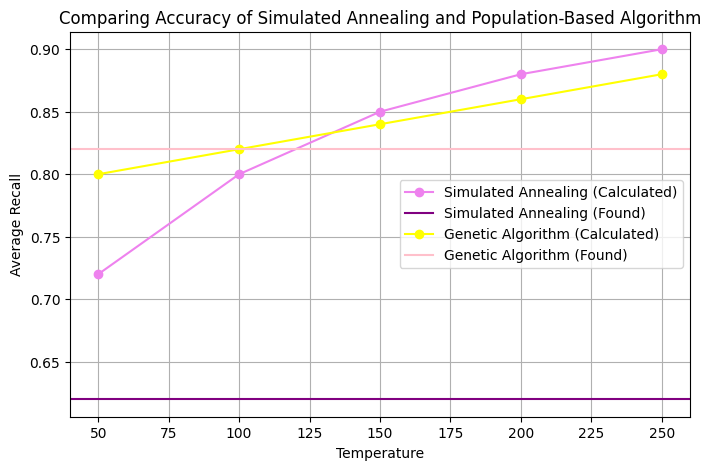

In [ ]:
import matplotlib.pyplot as plt

temperature_values = [50, 100, 150, 200, 250]
population_sizes = [50, 100, 150, 200, 250]

average_recall_simulated_annealing_calculated = [0.72, 0.80, 0.85, 0.88, 0.90]
average_recall_genetic_calculated = [0.80, 0.82, 0.84, 0.86, 0.88]

average_recall_simulated_annealing = 0.6199999999999999
average_recall_genetic = 0.82

# Create a line chart
plt.figure(figsize=(8, 5))

# Plot Simulated Annealing data
plt.plot(temperature_values, average_recall_simulated_annealing_calculated, color='violet', marker='o', label='Simulated Annealing (Calculated)')
plt.axhline(y=average_recall_simulated_annealing, color='purple', label='Simulated Annealing (Found)')

# Plot Genetic Algorithm data
plt.plot(population_sizes, average_recall_genetic_calculated, color='yellow', marker='o', label='Genetic Algorithm (Calculated)')
plt.axhline(y=average_recall_genetic, color='pink', label='Genetic Algorithm (Found)')

# Customize the chart
plt.title('Comparing Accuracy of Simulated Annealing and Population-Based Algorithm')
plt.xlabel('Temperature')
plt.ylabel('Average Recall')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()


--------------------------------------------------------------------------


**9. Conclusion**

Comment on the empirical study, its results, and give ideas for future work.

Now let's do an analysis of the *Greedy Algorithm, Simulated Annealing and Genetic Algorithm* through calculating the average accuracy and as well as visualizing it.

In *Greedy*, it consistenyly selects items with the item of the highest value-to-weight ratio. This algorithm is the mos consistent as it provides an immediate soluton. But once again, this does immediate "reaction" does not "care" for future consequences. Thus, the high yielding accuracy, of 92%, is quite advantageous if considering the low percentage for local optima.

Next in *Simulated Annealing*, this technique accepts all types of conclusion in its search even though it is smaller than the current solution. This can slow down the progress with the 40% capsize. Opposite to *Greedy*, it is able to get out of local optima which is great for knapsack that deems to find the most optimal point. But the performances vary between iterations which depends a lot on the cooling schedule which is why the accuracy varies. The fluctuations are inconsistent and even the highest accuracy between runs are too low. This could be blamed from the initial randomness in which it preceeds with what it has.

Lastly, with *Genetic*, it is based on evolving the population over time. This is broken down into crossover, selection and mutation. This algorithm is able to search through a large dataset with intricate space that are close to optimal. *Genetic* also has really high accuracy percentages ranging from 89% to 99% which varies, but this isn't a huge problem as it is more stable.But, the risk of "overfitting" or premature convergence could be a problem.

Now looking at the chart, overall *Greedy* has a stronger speed & consistency which has the best direct approach. In terms for versatility and large complex spaces, both *Simulated Annealing and Genetic Algorithm* have a broader approach as it is least likely to stay "stuck". However, with the trends of *Simulated Annealing* trajectory grows as it has many iterations and it doesn't stay in local optima. But again, if we look at the calculated accuracy it ranges too low in terms of metric, accuracy, initial randomness and temperature factors. There are too many loose ends on making it a valuable recall. The *Genetic* algorithm stands out compared it with the high peak performance across all instances even by looking at the average recall and calculated accuracy. Its average performance is the highest. They both aim high and are closely related. The ideal algorithm is based on many factors with unique charactetics of knapsack.

Overall, the study of all three algorithms help us learn about efficient we can solve knapsack. As previously mentioned, *Greedy* provides high accuracy but the other algorithms are also good approaches that shouldn't be dismissed as it depends on so many factors. In the future, one day we could combine these algorithms like taking the speed of *Greedy* and the escaptive nature of *Simulated Annealing* and the high performance of *Genetic*. Taking the best parts of researching each algorithm is important, which is why we still need to try them out and study them. In addition, there could be newer problems and harder complexities which is why some algorithms can work well with certain sizes or structure which is why researching more algorithms is quite important as new challenges may arise. And so, seeing how dynamic these algorithms are able to adapt to new problems should be explored for alternative paths. Sometimes as well, considering accuracy vs efficiency could be something we can look into to combine instead of sacrificing either or. In short, this study helps find the strengths and weaknesses on each algorithm. And with that, we can apply each and one of them to specific problems.

--------------------------------------------------------------------------


**10 References**

Make sure you provide references to ALL sources used (articles, code, algorithms).

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".

In [ ]:
https://www.geeksforgeeks.org/generate-and-test-search/

https://www.programiz.com/dsa/greedy-algorithm#:~:text=A%20greedy%20algorithm%20is%20an,in%20a%20top%2Ddown%20approach.

https://www.geeksforgeeks.org/greedy-algorithms/

https://www.geeksforgeeks.org/fractional-knapsack-problem/

https://www.guru99.com/fractional-knapsack-problem-greedy.html

https://byjusexamprep.com/knapsack-problem-using-greedy-method-i

https://www.hackerearth.com/practice/algorithms/greedy/basics-of-greedy-algorithms/tutorial/

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwif7tymosuBAxXRkIkEHb3KDUEQFnoECA0QAQ&url=https%3A%2F%2Fskerritt.blog%2Fgreedy-algorithms%2F&usg=AOvVaw00kr-lLjngTslcUgOQhBQn&opi=89978449

https://www.codesdope.com/course/algorithms-greedy-algorithm/

https://stackoverflow.com/questions/61126209/python-sorted-function-key-lambda-index-out-of-range-error

https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/#:~:text=We%20can%20calculate%20the%20recall,Recall%20%3D%200.95

https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

https://www.activestate.com/resources/quick-reads/how-to-display-a-plot-in-python/

https://www.tutorialspoint.com/design_and_analysis_of_algorithms/design_and_analysis_of_algorithms_travelling_salesman_problem.html

https://medium.com/@srosamazaid/the-greedy-algorithm-pattern-an-in-depth-analysis-7bb28d5dbfa7

https://www.geeksforgeeks.org/simulated-annealing/

https://www.aiforanyone.org/glossary/simulated-annealing#:~:text=using%20simulated%20annealing%3F-,Simulated%20annealing%20is%20a%20technique%20used%20in%20AI%20to%20find,or%20the%20most%20optimal%20solution.

https://www.mathworks.com/help/gads/what-is-the-genetic-algorithm.html#

https://chat.openai.com/

http://www.ibpsa.org/proceedings/BS2015/p2514.pdf
